# Proyek Analisis Data: E-Commerce
- **Nama:** Reynaldy Simanungkalit
- **Email:** 221112127@students.mikroskil.ac.id
- **ID Dicoding:** MC172D5Y1311

## Menentukan Pertanyaan Bisnis

- 1.Apa kategori produk yang paling banyak dibeli dan bagaimana distribusi metode pembayaran yang digunakan oleh pelanggan?
- 2.Bagaimana tren penjualan dari waktu ke waktu?
- 3.Kategori barang apa yang paling sering dibeli berdasarkan lokasi pelanggan?

## Import Semua Packages/Library yang Digunakan

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

[1] Pada tahap ini , Saya akan impor dataset dan melakukan eksplorasi data awal untuk mengidentifikasi struktur dataset

In [322]:
product_translation = pd.read_csv("data/product_category_name_translation.csv")

# mengambil semua data dan memasukan ke df_data
df_data = {
    "order_reviews": pd.read_csv("data/order_reviews_dataset.csv"),
    "orders": pd.read_csv("data/orders_dataset.csv"),
    "products": pd.read_csv("data/products_dataset.csv").merge(product_translation, on='product_category_name', how='left'),
    "sellers": pd.read_csv("data/sellers_dataset.csv"),
    "customers": pd.read_csv("data/customers_dataset.csv"),
    "order_items": pd.read_csv("data/order_items_dataset.csv"),
    "order_payments": pd.read_csv("data/order_payments_dataset.csv"),
    "geolocation": pd.read_csv("data/geolocation_dataset.csv")
}

#untuk menampilkan 2 data dari semua dataset df_data
i = 1  
for name, df in df_data.items():
    print(f"[{i}] Dataset: {name}")
    i += 1
    display(df.head(2)) 
    print("-" * 50)

[1] Dataset: order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


--------------------------------------------------
[2] Dataset: orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


--------------------------------------------------
[3] Dataset: products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art


--------------------------------------------------
[4] Dataset: sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


--------------------------------------------------
[5] Dataset: customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


--------------------------------------------------
[6] Dataset: order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


--------------------------------------------------
[7] Dataset: order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


--------------------------------------------------
[8] Dataset: geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


--------------------------------------------------


**Insight:**
- Dataset yang digunakan terdiri dari delapan tabel yang saling terkait, yaitu order_reviews, orders, products, sellers, customers, order_items, order_payments, dan geolocation. Jumlah baris dalam setiap tabel bervariasi.


### Assessing Data

Pada tahap ini, saya akan memeriksa data yang tersedia, termasuk mencari missing value, duplikasi, dan berbagai aspek lainnya di seluruh dataset.

#### [1]Pengecekan Tipe Data

In [323]:
print("Menampilkan Tipe Data dari Setiap Dataset:\n")
for name, df in df_data.items():
    print(f"Dataset: {name}")
    print("Tipe Data Kolom:")
    print(df.dtypes)
    print("-" * 40)

Menampilkan Tipe Data dari Setiap Dataset:

Dataset: order_reviews
Tipe Data Kolom:
review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object
----------------------------------------
Dataset: orders
Tipe Data Kolom:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object
----------------------------------------
Dataset: products
Tipe Data Kolom:
product_id                        object
product_category_name             object
product_name_lenght              float64
product_description_lenght       float64
product_photos_q

#### [2]Pengecekan Missing Value

In [324]:
def cek_missing_values(df, nama):
    missing = df.isnull().sum()
    total_kosong = missing.sum()
    
    print("=" * 50)
    print(f"Analisis Missing Values - {nama}")
    print("=" * 50)
    print(f"Total nilai yang hilang: {total_kosong}")
    
    if total_kosong > 0:
        print("\nKolom dengan missing values:")
        print(missing[missing > 0])
    else:
        print("Tidak ada nilai yang hilang.")
    
    print("+" * 50)

# Loop untuk mengecek semua dataset
print("Pemeriksaan Missing Values pada Semua Dataset")
for nama, df in df_data.items():
    cek_missing_values(df, nama)

Pemeriksaan Missing Values pada Semua Dataset
Analisis Missing Values - order_reviews
Total nilai yang hilang: 145903

Kolom dengan missing values:
review_comment_title      87656
review_comment_message    58247
dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
Analisis Missing Values - orders
Total nilai yang hilang: 4908

Kolom dengan missing values:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
Analisis Missing Values - products
Total nilai yang hilang: 3071

Kolom dengan missing values:
product_category_name            610
product_name_lenght              610
product_description_lenght       610
product_photos_qty               610
product_weight_g                   2
product_length_cm                  2
product_height_cm                  2
product_width_cm                   2
product_category_name_english    623
dtype: int64
++++++++++++

Disini saya menemukan adanya missing value pada **ORDER_REVIEWS**, **ORDERS**,dan **PRODUCTS**

#### [3]Pengecekan Duplikat Data

In [325]:
print("Pengecekan Data Duplikat")
print("=" * 50)

for nama, df in df_data.items():
    jumlah_duplikat = df.duplicated().sum()
    print(f"{nama}:  {jumlah_duplikat} ditemukan duplikat")

print("=" * 50)

Pengecekan Data Duplikat
order_reviews:  0 ditemukan duplikat
orders:  0 ditemukan duplikat
products:  0 ditemukan duplikat
sellers:  0 ditemukan duplikat
customers:  0 ditemukan duplikat
order_items:  0 ditemukan duplikat
order_payments:  0 ditemukan duplikat
geolocation:  261831 ditemukan duplikat



- Saya menemukan data duplikat pada data **GEOLOCATION**

### Cleaning Data

Pada tahap ini, saya akan membersihkan data setelah mengidentifikasi bagian yang mengandung missing value atau duplikasi di setiap dataset.

#### [1]Membersikaan data satu persatu 

### Penyelesaian missing values pada bagian **order_reviews**

In [326]:
# Mengisi missing values dengan 'No Comment' pada baggian order_reviews
df_data["order_reviews"]['review_comment_title'].fillna('No Comment', inplace=True)
df_data["order_reviews"]['review_comment_message'].fillna('No Comment', inplace=True)

# Menampilkan jumlah missing values setelah cleaning
print("\nJumlah missing values setelah dibersihkan:")
print(df_data["order_reviews"].isna().sum())


Jumlah missing values setelah dibersihkan:
review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


### Penyelesaian missing values pada bagian **orders**

1. Menghapus data yang missing 

In [327]:
# 1. Menghapus baris yang memiliki nilai kosong di kolom apa pun
df_data["orders"].dropna(inplace=True)

# 2. Menampilkan jumlah missing values yang tersisa di setiap kolom
print("\nJumlah missing values setelah penghapusan:")
print(df_data["orders"].isna().sum())


Jumlah missing values setelah penghapusan:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


2. Mengkonversi data order_purchase_timestamp dan order_delivered_customer_date ke dalam format datetime

In [328]:
df_data["orders"]['order_purchase_timestamp'] = pd.to_datetime(df_data["orders"]['order_purchase_timestamp'])
df_data["orders"]['order_delivered_customer_date'] = pd.to_datetime(df_data["orders"]['order_delivered_customer_date'])
print("Kolom tanggal telah diubah ke tipe data datetime.")

Kolom tanggal telah diubah ke tipe data datetime.


### Penyelesaian missing values pada bagian **Products**

In [329]:
# 1. Mengisi kolom 'product_category_name' dengan 'unknown'
df_data["products"]['product_category_name'].fillna('unknown', inplace=True)

# 2. Mengisi missing values di kolom numerik dengan median
df_data["products"]['product_name_lenght'].fillna(df_data["products"]['product_name_lenght'].median(), inplace=True)
df_data["products"]['product_description_lenght'].fillna(df_data["products"]['product_description_lenght'].median(), inplace=True)
df_data["products"]['product_photos_qty'].fillna(df_data["products"]['product_photos_qty'].median(), inplace=True)

# 3. Mengisi missing values di kolom dimensi produk (weight, length, height, width) dengan median
for col in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    df_data["products"][col].fillna(df_data["products"][col].median(), inplace=True)

# 4. Menampilkan pesan setelah selesai
print("Missing values di tabel PRODUCTS telah diisi.")

Missing values di tabel PRODUCTS telah diisi.


#### Penyelesaian masalah duplikat pada **geolocation**

In [330]:
df_data["geolocation"].drop_duplicates(inplace=True)

#### [2] Melakukan Pengecekan ulang pada data 

In [331]:
print("\nMissing Values setelah Cleaning:")
for name, df in df_data.items():  # Iterasi melalui semua tabel di df_data
    missing_count = df.isnull().sum().sum()  # Menghitung total missing values di seluruh DataFrame
    print(f"{name}: {missing_count} missing values")

print("\nJumlah Data Duplikat setelah Cleaning:")
for name, df in df_data.items():  # Iterasi melalui semua tabel di df_data
    duplicate_count = df.duplicated().sum()  # Menghitung jumlah baris duplikat
    print(f"{name}: {duplicate_count} duplikat")


Missing Values setelah Cleaning:
order_reviews: 0 missing values
orders: 0 missing values
products: 623 missing values
sellers: 0 missing values
customers: 0 missing values
order_items: 0 missing values
order_payments: 0 missing values
geolocation: 0 missing values

Jumlah Data Duplikat setelah Cleaning:
order_reviews: 0 duplikat
orders: 0 duplikat
products: 0 duplikat
sellers: 0 duplikat
customers: 0 duplikat
order_items: 0 duplikat
order_payments: 0 duplikat
geolocation: 0 duplikat


disini saya sudah tidak menemukan data yang missing value atau duplicate

**Insight:**
- Duplikat pada tabel geolocation dihapus untuk menjaga integritas data.
- Setelah proses pembersihan, tidak ada lagi nilai yang hilang atau duplikat dalam dataset.

## Exploratory Data Analysis (EDA)

### 1.Explore Data 


explore data Products

In [332]:
products = df_data["products"]
products.sample(5)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
7994,40bc6155bfab13c191f9d5a72ebe12c7,telefonia,55.0,2428.0,3.0,100.0,13.0,20.0,13.0,telephony
7320,d9d3f97d19971e6e134c04428b7ef416,moveis_decoracao,59.0,669.0,2.0,600.0,16.0,12.0,15.0,furniture_decor
21189,ab0a97f604550b5b5b99180a6dc04461,tablets_impressao_imagem,34.0,150.0,1.0,150.0,60.0,11.0,11.0,tablets_printing_image
26008,0900e9b18da6627157a7e47a8ac8fc08,relogios_presentes,56.0,179.0,3.0,200.0,16.0,2.0,20.0,watches_gifts
10447,db9e2ea2789762e3b0ecb627eb70696d,moveis_decoracao,40.0,240.0,4.0,5350.0,52.0,6.0,52.0,furniture_decor


In [333]:
products.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32328
unique,32951,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3029
mean,NaN,NaN,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534,NaN
std,NaN,NaN,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707,NaN
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,NaN
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000,NaN
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000,NaN
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000,NaN


In [334]:
# Menghitung jumlah produk per kategori
products.product_id.is_unique

True

Explore data orders

In [335]:
orders = df_data["orders"]
orders.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
52475,2d3518f1b535de87ccf593d3892022af,60be07ae31950ebb5bb4c2202837abc9,delivered,2018-03-01 10:21:56,2018-03-01 10:35:34,2018-03-02 01:24:53,2018-03-07 20:38:40,2018-03-26 00:00:00
34425,0b9a8b8e703c7c54c11e7f2a057d3cfc,5a6661b43e78a355ca55ac1443db9e50,delivered,2018-03-11 09:27:22,2018-03-11 10:29:30,2018-03-12 18:59:42,2018-04-11 21:38:53,2018-04-13 00:00:00
36703,93c876d3232e6a2353011f181e7f3c40,a3d2aebb19110db6d233642344452394,delivered,2018-04-05 15:10:04,2018-04-05 15:29:29,2018-04-06 23:41:10,2018-04-10 15:10:00,2018-04-30 00:00:00
42879,1bb197bb1c2e1350cb9937b1356ad184,abd2006bcbd417ea5d1d6356d76bc39d,delivered,2017-11-16 13:13:59,2017-11-16 13:31:03,2017-11-17 21:52:12,2017-11-25 16:27:13,2017-12-06 00:00:00
30800,b6f97ad9a7a85e2ad594c746a46dab44,7ee3b6ba60d9136f98ec0875ffa33375,delivered,2018-01-17 17:34:42,2018-01-17 17:50:48,2018-01-19 18:32:14,2018-01-31 19:22:56,2018-02-14 00:00:00


In [336]:
orders.order_id.is_unique

True

Explore data order_items

In [337]:
order_items = df_data["order_items"]
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
75091,ab0d9bfe4d447ca3510b74578d5781c0,1,11dcc970f7a5581e1bf777b6da3f7096,06579cb253ecd5a3a12a9e6eb6bf8f47,2018-03-06 16:31:15,69.9,27.04
19247,2c3c322c51f8d1a0da8e2de75db68341,1,2fea0f2cec6b6324a277d4a61c2ed2c6,beadbee30901a7f61d031b6b686095ad,2018-09-05 04:35:22,95.0,15.77
65605,95f5825a4d547b92c4f1824df000084c,1,e02758c6570548237ebc9fe75b4701fb,e7df4cd29ab5abab70fb0783ddb53987,2018-02-02 12:55:54,1019.0,20.74
1996,048846960b74c996a4af7802498f52f2,1,c9dcb2deb4a49214eb9e72aafd096eef,bacb1f0ed56ad24198f5810d2b3fe9a5,2017-06-12 14:15:07,149.9,8.79
103040,e9fc4383978e3a12dcb8a7f429d12a9d,1,423a6644f0aa529e8828ff1f91003690,e59aa562b9f8076dd550fcddf0e73491,2018-03-07 20:09:32,465.0,24.09


In [338]:
orders.order_id.is_unique

True

Explore data order_payments

In [339]:
order_payments = df_data["order_payments"]
order_payments.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
20110,f3c997e9b2e9848caab4687aabaee30b,1,boleto,1,310.67
52015,f68550a60fc010eda8ef9a1e5cd4d651,1,credit_card,6,138.92
94707,852fab0ef8986c549194d5959498f160,1,boleto,1,22.60
94486,c37055276c0cc69b996259acf465906b,1,credit_card,4,45.00
29458,37ddd5dd20d5259555dc5c1801039b7d,1,credit_card,10,149.09


In [340]:
order_payments.order_id.is_unique

False

Explore data customers

In [341]:
customers = df_data["customers"]
customers.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
52166,d6e5dc4f46a8ddad718544fa2aff3ab9,dcb28d3940f1c2405051064702f09419,79200,aquidauana,MS
69923,be25fc519149fff767b78b8c37742fe2,eb0942a2e9a6124956c421c8ad5cae30,88815,criciuma,SC
37634,392255645b4374138db8341ef76a8de7,fbc56033bdc4a266370de69012019a97,13052,campinas,SP
96179,be52d3846e7c0522f6cf8e4374905d10,7c61df63da03abb1153e68b3bf758f0e,5661,sao paulo,SP
17154,351862afb171174da309fadda7304c76,016a528e7cb02b29de37ea55cf89b9d1,68625,paragominas,PA


In [342]:
customers.customer_id.is_unique

True

Explore data geolocation

In [343]:
geolocation = df_data["geolocation"]
geolocation.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
763154,65914,-5.498417,-47.444056,imperatriz,MA
282733,12929,-22.911891,-46.520082,bragança paulista,SP
177961,6950,-23.984439,-47.146153,juquitiba,SP
971098,95670,-29.374428,-50.885780,gramado,RS
675213,41320,-12.907179,-38.434475,salvador,BA


#### 2. Melakukan penggabungan data

2a. Menggabungka data order_items,poducts dan order payments . Disatukan dalam  bestsell

In [344]:
# Menggabungkan order_items dengan products berdasarkan product_id
merged_df = pd.merge(
    left=order_items,
    right=products,
    how="left",
    on="product_id"
)

# Menggabungkan hasil sebelumnya dengan order_payments berdasarkan order_id
bestsell_df = pd.merge(
    left=merged_df,
    right=order_payments,
    how="left",
    on="order_id"
)

bestsell_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value
54171,75a9432bc86fcd9061f4557cc03183ef,1,66d92b0c49af34728904a73c26e9e59a,fa1c13f2614d7b5c4749cbc52fecda94,2018-08-24 08:55:29,355.90,20.59,relogios_presentes,56.0,582.0,1.0,450.0,16.0,19.0,14.0,watches_gifts,1.0,credit_card,2.0,376.49
99626,d86e65a13d3e7a90d876cb6b9064f1ac,1,45dcebc4f3d844e116f01e3f191711dc,f7496d659ca9fdaf323c0aae84176632,2018-08-14 16:04:46,189.90,17.60,utilidades_domesticas,63.0,771.0,11.0,3000.0,47.0,25.0,32.0,housewares,1.0,credit_card,1.0,207.50
62166,878da2363edf85ee1af1935bab61fcd0,1,808a67fcfceaae1ecb87b9e85260e593,1d4587203296c8f4ad134dc286fa6db0,2018-03-01 12:29:33,53.90,11.73,automotivo,37.0,874.0,1.0,2875.0,60.0,21.0,25.0,auto,1.0,credit_card,1.0,65.63
32977,477d8df8acc3c2b3f1fbb4e41c4f7f32,1,d5ad2be418dec48e9d0c4745e431c384,f457c46070d02cadd8a68551231220dd,2018-07-04 12:49:48,89.90,13.97,informatica_acessorios,43.0,893.0,1.0,150.0,21.0,11.0,12.0,computers_accessories,1.0,credit_card,2.0,103.87
15652,22167b7870f3c3b844087c5cbafac521,1,d02d1fb4bb52737b8d68075e5a079a4a,7c67e1448b00f6e969d365cea6b010ab,2018-03-23 02:30:38,146.99,40.42,moveis_escritorio,42.0,1384.0,1.0,13175.0,57.0,55.0,22.0,office_furniture,1.0,boleto,1.0,187.41


2b. Menggabungkan orders(orders_dataset) dan order_items berdasarkan order_id

In [345]:
# Menggabungkan orders dan order_items berdasarkan order_id
tren_df = pd.merge(
    left=orders,
    right=order_items,
    how="left",
    on="order_id"
)

tren_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
5418,64cc5eadd86b15a6b38bddbeb61ef944,a1188e9345ab24476119f9fedd151813,delivered,2017-11-24 16:40:20,2017-11-28 02:59:34,2017-12-01 19:09:07,2017-12-04 19:32:45,2017-12-08 00:00:00,1,e52ba7b3c98465f5b618ed526d399357,ef506c96320abeedfb894c34db06f478,2017-12-04 02:59:34,18.00,7.78
22676,0fa7d9917a1ee1293fb2207496213d1e,58c8b60b34b39a6bf01341c08e03aaa6,delivered,2017-12-23 16:49:24,2017-12-23 17:10:33,2018-01-04 23:24:24,2018-01-17 20:13:10,2018-01-22 00:00:00,1,9cc0259ca653fa86df45978b3791b155,adbc26658d6c7b4b6219f9d934598091,2017-12-29 17:10:33,130.00,17.16
55705,8653f85aa59de4b89435d4b44c8da67c,3c5aa9e8bb943cbafdd0ed71feb55d7a,delivered,2018-03-26 13:30:42,2018-03-27 03:48:06,2018-03-28 00:26:39,2018-05-09 23:08:48,2018-04-24 00:00:00,1,5328338cfaa16ba10561cd970c73ca11,12b9676b00f60f3b700e83af21824c0e,2018-04-09 03:48:06,199.00,26.15
20652,aafd191085488777c9d6b1aa8335ddd7,6e4e92020773c17f824fcec1f80d11ef,delivered,2017-05-02 21:33:57,2017-05-04 02:55:44,2017-05-04 13:37:30,2017-05-15 13:21:50,2017-06-01 00:00:00,1,f7bb503725fb4d7bb55301d5bceba728,55a5b51f93f2b70ea513f5a047b0262a,2017-05-10 02:55:44,99.70,14.87
100521,4ab8d41a01fbd0a52d7de288e25463ac,4e9bdfdb280a2b7b1c13b72a01758b16,delivered,2017-09-26 13:34:04,2017-09-26 13:49:36,2017-09-27 20:04:05,2017-10-02 22:48:27,2017-10-20 00:00:00,1,efad749f1311a53b69d30ceed3baa52a,897060da8b9a21f655304d50fd935913,2017-10-02 13:49:36,16.16,15.10


2c. Menggabungkan bestsell_df dengan tren_df berdasarkan order_id

In [346]:
# Menggabungkan bestsell_df dengan tren_df berdasarkan order_id
gabungan_df = pd.merge(
    left=bestsell_df,
    right=tren_df,
    how="left",
    on="order_id"
)

gabungan_df.sample(5)


,order_id,order_item_id_x,product_id_x,seller_id_x,shipping_limit_date_x,price_x,freight_value_x,product_category_name,product_name_lenght,product_description_lenght,...,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id_y,product_id_y,seller_id_y,shipping_limit_date_y,price_y,freight_value_y
96737,987b037ce809649fbc99bb85a3cc022c,1,dad26ceb001cd2ad238e30d744bd9aa2,2e13c71026e1a39ba5cc1b86dcb679aa,2018-05-04 06:30:32,133.00,18.51,esporte_lazer,47.0,2554.0,...,2018-04-28 07:00:28,2018-05-03 13:43:00,2018-05-08 18:52:03,2018-06-04 00:00:00,3.0,dad26ceb001cd2ad238e30d744bd9aa2,2e13c71026e1a39ba5cc1b86dcb679aa,2018-05-04 06:30:32,133.00,18.51
105533,a51878c7b567d6bb29abf33bbbd80c24,1,ee339563912cfcc8a006239baba4d8f3,120476eb7a04c149d14772edaf5d9bf2,2018-08-02 12:05:10,293.00,16.21,construcao_ferramentas_construcao,59.0,822.0,...,2018-07-27 12:05:10,2018-07-27 13:49:00,2018-07-30 15:03:16,2018-08-13 00:00:00,2.0,ee339563912cfcc8a006239baba4d8f3,120476eb7a04c149d14772edaf5d9bf2,2018-08-02 12:05:10,293.00,16.21
13888,16cb3a72f04e248a1244b076ce0d9bb7,1,39774ab6b55af4ca99782e23935a97a4,7c67e1448b00f6e969d365cea6b010ab,2018-06-08 14:37:15,149.99,74.78,moveis_escritorio,43.0,1363.0,...,2018-05-23 14:37:15,2018-06-11 09:07:00,2018-06-19 18:50:58,2018-07-05 00:00:00,1.0,39774ab6b55af4ca99782e23935a97a4,7c67e1448b00f6e969d365cea6b010ab,2018-06-08 14:37:15,149.99,74.78
42450,428a2f660dc84138d969ccd69a0ab6d5,7,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22,moveis_decoracao,59.0,1744.0,...,2017-11-24 10:31:10,2017-11-28 16:42:21,2017-12-13 20:19:35,2017-12-19 00:00:00,13.0,89b190a046022486c635022524a974a8,f326006815956455b2859abd58fe7e39,2017-11-30 10:30:51,65.49,16.22
65963,677903861e5a22d39b6c208476a62fe4,2,6d3d8ade6b793a08b041b6bc653c08ca,5343d0649eca2a983820bfe93fc4d17e,2018-03-21 08:49:33,39.00,22.93,moveis_decoracao,53.0,502.0,...,2018-03-15 08:49:33,2018-03-16 20:12:50,2018-03-22 22:41:04,2018-04-05 00:00:00,1.0,6d3d8ade6b793a08b041b6bc653c08ca,5343d0649eca2a983820bfe93fc4d17e,2018-03-21 08:49:33,39.00,22.93


Gabungkan gabungan_df dengan customers berdasarkan customer_id | Penggabungan seluruh dataset .

In [347]:
#Mengabunggkan gabungan_df dengan customers berdasarkan customer_id 
Main_df = pd.merge(
    left=gabungan_df,
    right=customers,
    how="left",
    on="customer_id"
)

# menampilkan hasil penggabungan 
Main_df.head()

,order_id,order_item_id_x,product_id_x,seller_id_x,shipping_limit_date_x,price_x,freight_value_x,product_category_name,product_name_lenght,product_description_lenght,...,order_item_id_y,product_id_y,seller_id_y,shipping_limit_date_y,price_y,freight_value_y,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


digabungkan dan di extrak menjadi Main_data.csv

In [348]:
Main_df.to_csv("Main_data.csv", index=False)

3.Melakukan analisis penjualan terbanyak berdasarkan kategori

In [349]:
# Hitung jumlah penjualan per kategori produk
category = Main_df.groupby('product_category_name_english').size().sort_values(ascending=False).reset_index()
category.columns = ['product_category', 'total_sales']

# Tampilkan tabel
print("Penjualan Terbanyak Berdasarkan Kategori Produk:")
category.head()

Penjualan Terbanyak Berdasarkan Kategori Produk:


,product_category,total_sales
0,bed_bath_table,17233
1,furniture_decor,15272
2,health_beauty,12830
3,computers_accessories,12209
4,housewares,11575


4. melakukan analisis tipe pembayaran yang dilakukan 


In [ ]:
#Group by 'payment_type' dan 'product_category_name' agg dengan order item id
tipe_pembayaran = Main_df.groupby(['payment_type', 'product_category_name']).agg(
    total_items=('order_item_id_x', 'sum'),  # Jumlah total item yang dipesan    
).reset_index()

# Tampilkan hasil
tipe_pembayaran
#

,payment_type,product_category_name,total_items
0,boleto,agro_industria_e_comercio,203
1,boleto,alimentos,141
2,boleto,alimentos_bebidas,265
3,boleto,artes,58
4,boleto,artes_e_artesanato,11
...,...,...,...
269,voucher,tablets_impressao_imagem,4
270,voucher,telefonia,264
271,voucher,telefonia_fixa,14
272,voucher,unknown,163


5.Menganalisis tren pemasaran

In [355]:
# Tren pemesanan berdasarkan bulan 
#mengambil data order_purchase_timestamp untuk mengetahui jumlah pesanan per bulan
Main_df['month'] = Main_df['order_purchase_timestamp'].dt.to_period('M')  
monthly_orders = Main_df.groupby('month').size().reset_index(name='order_count')  # Menghitung jumlah pesanan per bulan

# Tampilkan hasil
print("Tren Pemesanan Berdasarkan Bulan:")
print(monthly_orders.to_string(index=False))

Tren Pemesanan Berdasarkan Bulan:
  month  order_count
2016-09            9
2016-10          506
2016-12            1
2017-01         1683
2017-02         2531
2017-03         4156
2017-04         3411
2017-05         5558
2017-06         4679
2017-07         6704
2017-08         7243
2017-09         6932
2017-10         8023
2017-11        12722
2017-12         8574
2018-01        11542
2018-02        11214
2018-03        11607
2018-04        11628
2018-05        11586
2018-06        10300
2018-07         9798
2018-08         9800


5.Menganalis kategori produk yang terjual berdasarkan customer_state

In [ ]:
# Menghitung kategori produk terlaris per negara bagian
kategori_terlaris = Main_df.groupby(['customer_state', 'product_category_name_english']).agg(
    order_count=("order_id", "count"),  
).reset_index()

print("Top 5 Kategori berang terlaris dari tiap negara bgaian :")
top = kategori_terlaris.groupby('customer_state').head(5)
top.head(10)

Top 5 Kategori berang terlaris dari tiap negara bgaian :


,customer_state,product_category_name_english,order_count
0,AC,auto,5
1,AC,baby,3
2,AC,bed_bath_table,8
3,AC,books_general_interest,2
4,AC,christmas_supplies,1
27,AL,agro_industry_and_commerce,1
28,AL,air_conditioning,1
29,AL,audio,5
30,AL,auto,24
31,AL,baby,7


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori Produk Terlaris dan Distribusi Metode Pembayaran

C:\Users\Reynaldy\AppData\Local\Temp\ipykernel_15396\852964999.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


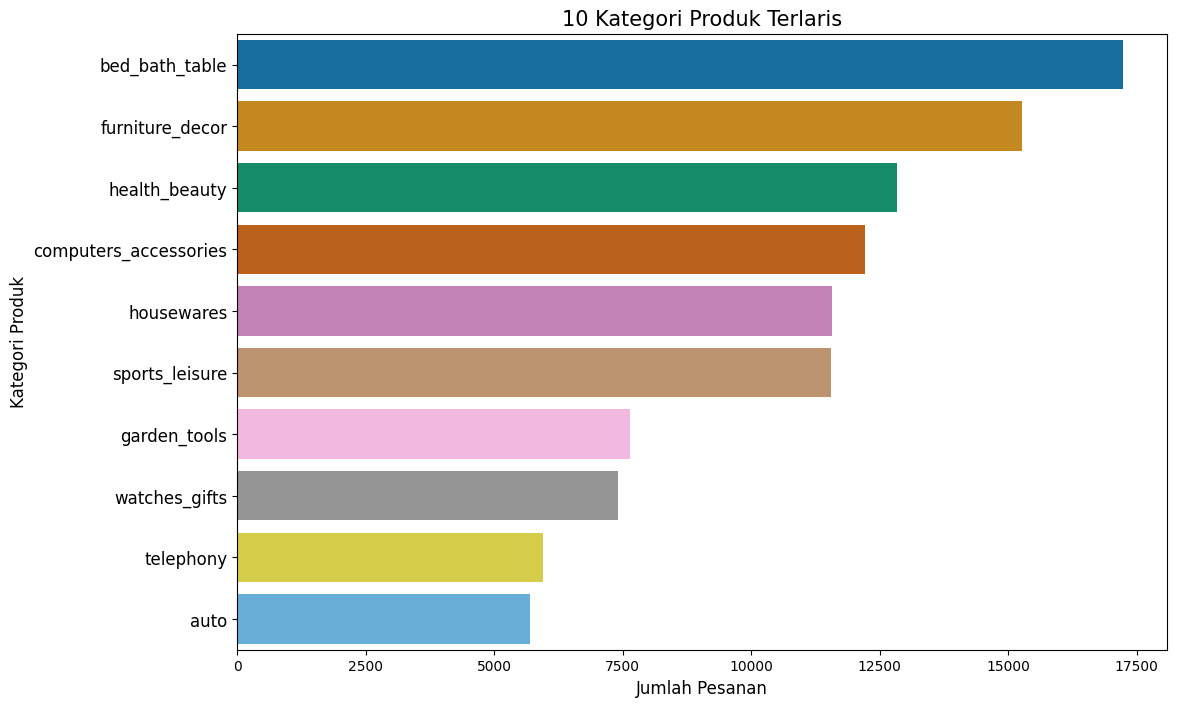

In [ ]:
kategori_terlaris = Main_df['product_category_name_english'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(
    y=kategori_terlaris.index, 
    x=kategori_terlaris.values,
    palette="colorblind"
)


plt.title("10 Kategori Produk Terlaris", loc="center", fontsize=15)
plt.xlabel("Jumlah Pesanan", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)
plt.tick_params(axis='y', labelsize=12)

C:\Users\Reynaldy\AppData\Local\Temp\ipykernel_15396\334026437.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


([0, 1, 2, 3, 4],
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'boleto'),
  Text(2, 0, 'voucher'),
  Text(3, 0, 'debit_card'),
  Text(4, 0, 'not_defined')])

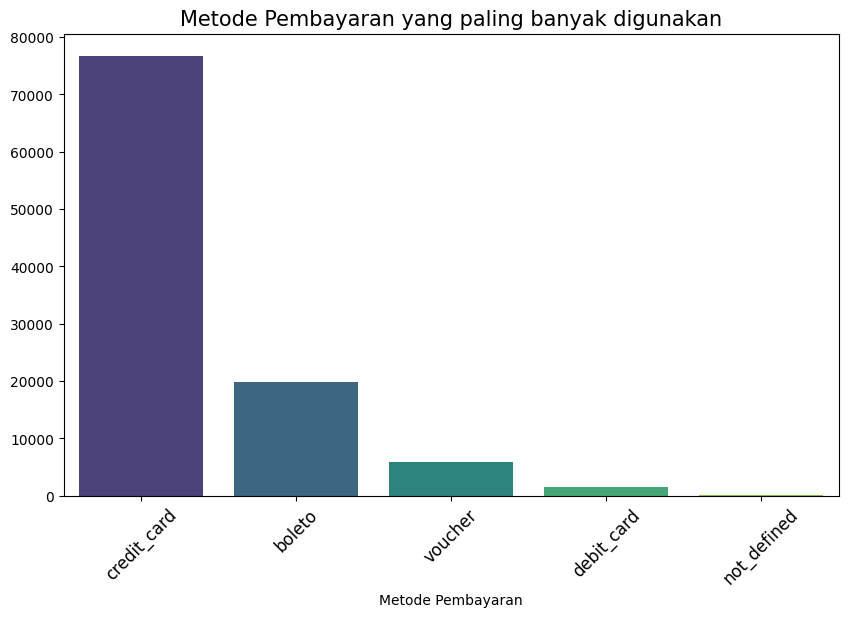

In [ ]:
metod_pembayran = order_payments.groupby('payment_type')['order_id'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    x=metod_pembayran.index, 
    y=metod_pembayran.values,
    palette="viridis"
)
plt.title("Metode Pembayaran yang paling banyak digunakan", loc="center", fontsize=15)
plt.xlabel("Metode Pembayaran")
plt.ylabel(None)
plt.xticks(rotation=45, fontsize=12)


**Insight:**

Berdasarkan visualisasi menggunakan barchart, kategori produk terlaris adalah bed_bath_table, diikuti oleh furniture_decor dan healt_beauty. Metode pembayaran paling populer adalah kartu kredit , diikuti oleh boleto , voucher , dan kartu debit. Kartu kredit juga memiliki nilai rata-rata transaksi tertinggi, menunjukkan kecenderungan pelanggan untuk menggunakan metode ini untuk pembelian bernilai lebih tinggi. Meskipun kartu kredit dominan di semua kategori, proporsi penggunaan metode pembayaran lain bervariasi tergantung pada kategori produk.

### Pertanyaan 2: Bagaimana tren penjualan dari waktu ke waktu?

Text(0, 0.5, 'Jumlah Pesanan')

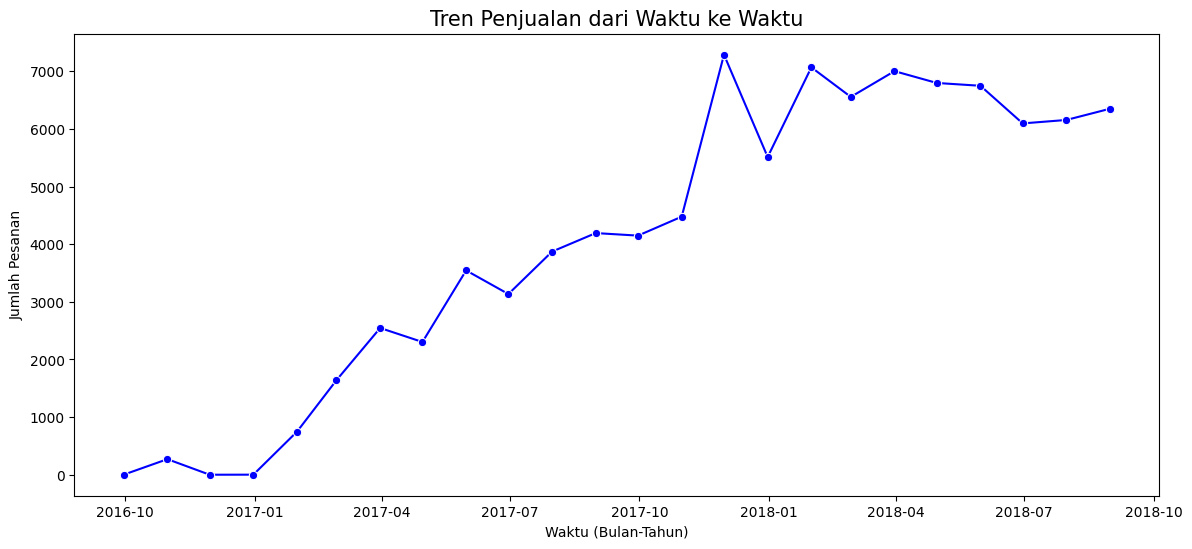

In [ ]:
# Hitung tren penjualan bulanan
monthly_sales = (
    orders.resample('M', on='order_purchase_timestamp')
    .size()
    .reset_index(name='total_orders')
)

plt.figure(figsize=(14, 6))
sns.lineplot(
    x='order_purchase_timestamp', 
    y='total_orders', 
    data=monthly_sales, 
    marker='o', 
    color='b'
)
plt.title("Tren Penjualan dari Waktu ke Waktu", loc="center", fontsize=15)
plt.xlabel("Waktu (Bulan-Tahun)")
plt.ylabel("Jumlah Pesanan")


**Insight:**
- Berdasarkan visualisasi line chart, terdapat tren peningkatan penjualan dari awal 2017 hingga akhir 2018, yang menunjukkan pertumbuhan bisnis yang positif. Namun, analisis juga mengungkapkan fluktuasi bulanan dalam jumlah pesanan, menandakan adanya pola musiman dalam perilaku pembelian.

### Pertanyaan 3:  Kategori barang apa yang paling sering dibeli berdasarkan lokasi pelanggan?

Text(0.5, 1.0, '5 Kategori Produk Terlaris Berdasarkan Lokasi Pelanggan')

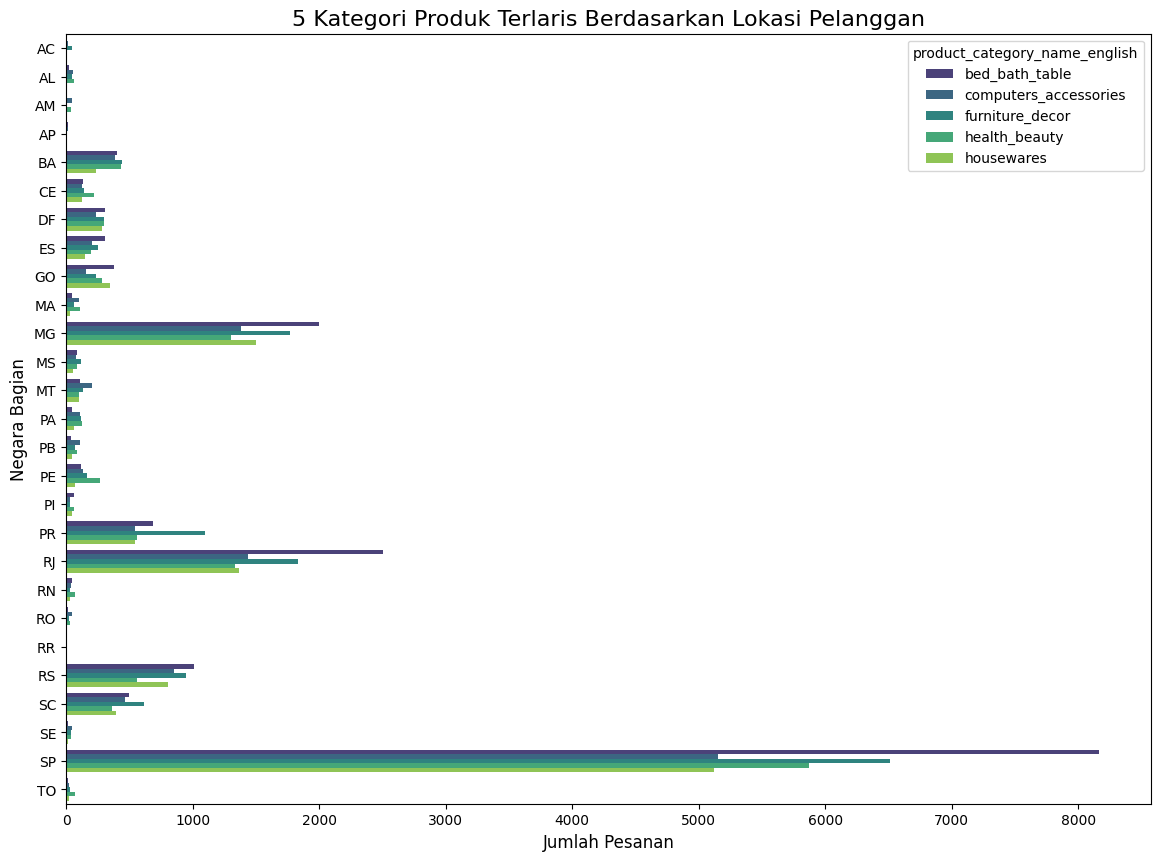

In [ ]:
# 5 kategori produk teratas secara keseluruhan
top5_categories = Main_df.groupby('product_category_name_english').size().nlargest(5).index.tolist()
filter_df = Main_df[Main_df['product_category_name_english'].isin(top5_categories)]

kategori_terlaris = Main_df[Main_df['product_category_name_english'].isin(top5_categories)].groupby(
    ['customer_state', 'product_category_name_english']
).agg(
    order_count=("order_id", "count")  
).reset_index()


plt.figure(figsize=(14, 10))
sns.barplot(
    x='order_count', 
    y='customer_state', 
    hue='product_category_name_english', 
    data=kategori_terlaris, 
    palette="viridis"
)

plt.xlabel("Jumlah Pesanan", fontsize=12)
plt.ylabel("Negara Bagian", fontsize=12)
plt.title("5 Kategori Produk Terlaris Berdasarkan Lokasi Pelanggan", fontsize=16)


## Analisis Lanjutan (Opsional)

In [431]:

rfm_df = Main_df.groupby(by="customer_id", as_index=False).agg({
    "order_delivered_customer_date": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "price_x": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-28 15:41:30,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-25 18:57:33,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-03-06 08:57:49,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-09-13 20:06:02,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-13 20:21:08,1,93.00


In [438]:
rfm_df.describe()

,max_order_timestamp,frequency,monetary
count,96461,96461.0,96461.000000
mean,2018-01-14 13:17:13.228102400,1.0,181.233842
min,2016-10-11 13:46:32,1.0,0.850000
25%,2017-09-25 22:31:59,1.0,48.900000
50%,2018-02-02 19:50:56,1.0,89.990000
75%,2018-05-15 23:08:54,1.0,169.990000
max,2018-10-17 13:22:46,1.0,107520.000000
std,NaN,0.0,589.961425


menentukan tingkat pelanggan beradasarkan monetory menggunakan rfm

In [436]:
# Hitung threshold
low_threshold = rfm_df['monetary'].quantile(0.33)   #3,%
medium_threshold = rfm_df['monetary'].quantile(0.66)  # 66%

# Kategorisasi menggunakan np.where
rfm_df['monetary_category'] = np.where(
    rfm_df['monetary'] <= low_threshold, "bronze",
    np.where(
        rfm_df['monetary'] <= medium_threshold, "silver", "gold"
    )
)

# Tampilkan hasil
rfm_df[['customer_id', 'monetary', 'monetary_category']].head()

,customer_id,monetary,monetary_category
0,00012a2ce6f8dcda20d059ce98491703,89.80,silver
1,000161a058600d5901f007fab4c27140,54.90,bronze
2,0001fd6190edaaf884bcaf3d49edf079,179.99,gold
3,0002414f95344307404f0ace7a26f1d5,149.90,gold
4,000379cdec625522490c315e70c7a9fb,93.00,silver


In [437]:
# Hitung jumlah pelanggan per kategori monetary
monetary_category_count = (
    rfm_df.groupby('monetary_category')  # Kelompokkan berdasarkan kategori monetary
    .agg(customer_count=('customer_id', 'nunique'))  # Hitung jumlah pelanggan unik
    .reset_index()  # Ubah hasil groupby menjadi DataFrame
)

# Tampilkan hasil
print("Jumlah Pelanggan per Kategori Monetary:")
monetary_category_count

Jumlah Pelanggan per Kategori Monetary:


,monetary_category,customer_count
0,bronze,31832
1,gold,32795
2,silver,31834


C:\Users\Reynaldy\AppData\Local\Temp\ipykernel_15396\1379087118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


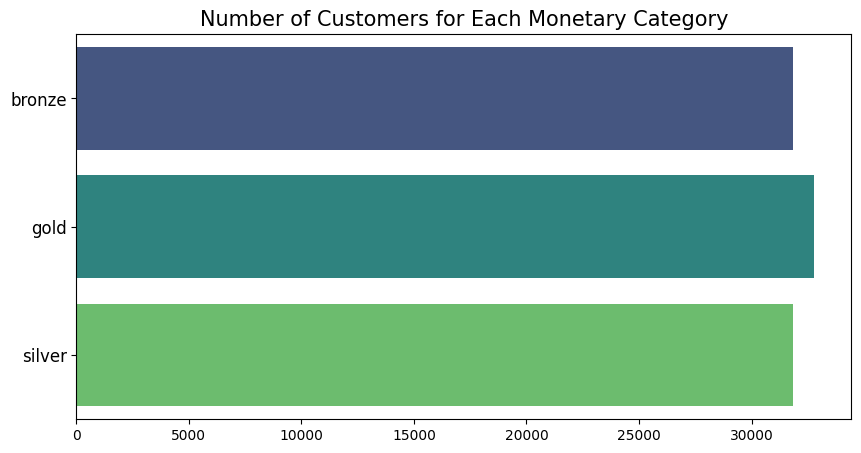

In [441]:
plt.figure(figsize=(10, 5))
# Warna untuk kategori Low, Medium, High
sns.barplot(
    x="customer_count", 
    y="monetary_category", 
    data=monetary_category_count, 
    palette="viridis"
)

# Atur judul dan label
plt.title("Number of Customers for Each Monetary Category", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)


## Conclusion

- Conclution pertanyaan 1 : Visualisasi menunjukkan bahwa Kategori "bed_bath_table" memimpin penjualan dengan 11.115 pesanan, diikuti "health_beauty" dan "sports_leisure". Kartu kredit mendominasi pembayaran (76.795 transaksi), dengan boleto dan voucher di posisi berikutnya. Pelanggan tampaknya mengutamakan kecepatan dan keamanan untuk transaksi bernilai tinggi.

- Conclution pertanyaan 2 : Visualisasi menunjukan Tren penjualan meningkat signifikan dari awal 2017 hingga akhir 2018, menandakan pertumbuhan bisnis positif. Namun, terlihat fluktuasi bulanan yang menunjukkan pola musiman pembelian. Penurunan di September-Oktober 2018 kemungkinan disebabkan data yang belum lengkap. Insight ini bermanfaat untuk perencanaan strategi penjualan, promosi, dan antisipasi periode penurunan penjualan.

- Conclution pertanyaan 3 : Visualisasi menunjukan kategori produk bervariasi signifikan antar negara bagian, mencerminkan perbedaan selera lokal. Beberapa kategori lebih diminati di wilayah tertentu dibanding lainnya. Data ini berguna untuk kustomisasi strategi pemasaran dan distribusi, serta identifikasi peluang pasar baru berdasarkan preferensi regional konsumen.